# Training and evaluating Singing Voice Detectors

In [2]:
import sys
sys.path.append('../vocaldetection/')
import sklearn
import utils
import json
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
labels = ['absent','present']

In [4]:
# Read features and labels
FEAT_PATH = os.environ["FEAT_PATH"]
PIECES = os.environ["PIECES_JSON"]

In [5]:
music_files = []

with open(PIECES) as json_file:  
    data = json.load(json_file)

    for music in data.keys():
        music_files.append(FEAT_PATH+music)

In [6]:
train_features = []
train_labels = []

for tf in music_files:
    # Load VGGish audio embeddings
    #vggish = pd.read_csv(tf+"_VGGish_PCA.csv",index_col=None, header=None)
    #vggish = vggish.values
    
    # Load MFCCs features
#     mfccs = pd.read_csv(tf+"_mfcc.csv",index_col=None, header=None)
#     mfccs = mfccs.values.T
    mfcc = np.load(tf+"_mfcc.npy")
    #print (mfcc.shape)
    
    # Load VocalVariance features
#     vv = pd.read_csv(tf+"_vocalvar.csv",index_col=None, header=None)
#     vv = vv.values.T
    #vv = np.load(tf+"_vocalvar.npy")
    #print (vv.shape)
    
    #fl = np.load(tf+"_fluctogram.npy")
    #print (fl.shape)

    # Read labels for each frame
#    labels = pd.read_csv(tf+"_lbl.csv",index_col=None, header=None)
#    labels = labels.values[0]
    lbl = np.load(tf+"_labels.npy")
    #print (lbl.shape)
    
    feature_vector = []
    for idx in range(len(lbl)):
        #feature_vector.append(np.concatenate((mfcc[idx], vv[idx], fl[idx]), axis=0))
        feature_vector.append(mfcc[idx])
        
    # Store the feature vector and corresponding label in integer format
    for idx in range(len(feature_vector)):
        train_features.append(feature_vector[idx])
        train_labels.append(lbl[idx])
    

In [7]:
X = np.array(train_features)
y = np.array(train_labels)

In [8]:
print (sum(y)/len(X))

0.6845667369355376


In [9]:
# Split dataset into train, validation and test sets

In [10]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [12]:
from sklearn.model_selection import KFold # import KFold
seed = 7
kf = KFold(n_splits=10, random_state=seed) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

10

In [13]:
# Shuffle dataframe to avoid use frames of same music on test 
### df.sample(frac=1).reset_index(drop=True)

In [14]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 2704  2705  2706 ... 27036 27037 27038] TEST: [   0    1    2 ... 2701 2702 2703]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [2704 2705 2706 ... 5405 5406 5407]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [5408 5409 5410 ... 8109 8110 8111]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [ 8112  8113  8114 ... 10813 10814 10815]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [10816 10817 10818 ... 13517 13518 13519]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [13520 13521 13522 ... 16221 16222 16223]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [16224 16225 16226 ... 18925 18926 18927]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [18928 18929 18930 ... 21629 21630 21631]
TRAIN: [    0     1     2 ... 27036 27037 27038] TEST: [21632 21633 21634 ... 24333 24334 24335]
TRAIN: [    0     1     2 ... 24333 24334 24335] TEST: [24336 24337 24338 ... 27036 27037 27038]


In [15]:
# Fit models

# Evaluate models

In [16]:
def plot_cm(cm):
    fig, ax = plt.subplots()
    ax.imshow(cm, interpolation='nearest', cmap='gray')
    for i, line in enumerate(cm):
        for j, l in enumerate(line):
            ax.text(j, i, l, size=20, color='green')
    ax.set_xticks(range(len(cm)))
    ax.set_xticklabels(labels)
    ax.set_yticks(range(len(cm)))
    ax.set_yticklabels(labels)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    plt.show()

In [17]:
X.shape

(27039, 104)

In [46]:
# save the scaler to disk
#filename = 'scaler_features.sav'
#joblib.dump(scaler, filename)

In [ ]:
# Use scikit-learn to train a model with the training features we've extracted
from sklearn.svm import SVC
import pandas as pd

results_svm = pd.DataFrame(columns=['classifier','parameter','accuracy', 'cm', 'features'])

classifier = 'SVM'
features = 'MFCC'

for train_index, test_index in kf.split(X):

    test_features_scaled = scaler.transform(X_test)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create a scale object
    scaler = sklearn.preprocessing.StandardScaler()

    # Learn the parameters from the training data only
    scaler.fit(X_train)

    # Apply the learned parameters to the training and test sets:
    train_features_scaled = scaler.fit_transform(X_train)

    test_features_scaled = scaler.transform(X_test)
    
    # Lets use a SVC with folowing C parameters: 
    params = [1, 0.1, 0.01, 0.001]

    for c in params:
        clf = SVC(C=c)

        # Fit (=train) the model
        clf.fit(train_features_scaled, y_train)

        # save the model to disk
        #filename = 'finalized_model_SVM_'+str(c)+'_VGGish.sav'
        #print (filename)
        #joblib.dump(clf, filename)

        # Now lets predict the labels of the test data!
        predictions = clf.predict(test_features_scaled)
        # SVM Accuracy
        accuracy = sklearn.metrics.accuracy_score(y_test, predictions)

        # lets compute the show the confusion matrix:
        cm = sklearn.metrics.confusion_matrix(y_test, predictions)
        
        results_svm.loc[results_svm.index.max() + 1] = [classifier, c, accuracy, cm, features]


TRAIN: [ 2704  2705  2706 ... 27036 27037 27038] TEST: [   0    1    2 ... 2701 2702 2703]


In [ ]:
results_svm.to_pickle('results_svm.pkl')

0.7894931557528672
[[ 403  265]
 [ 304 1731]]


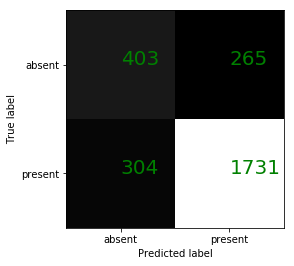

0.8087310395856456
[[ 408  260]
 [ 257 1778]]


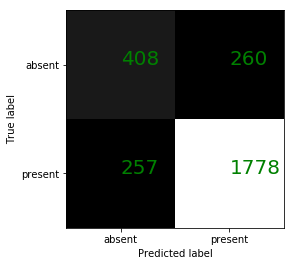

0.8435072142064373
[[ 465  203]
 [ 220 1815]]


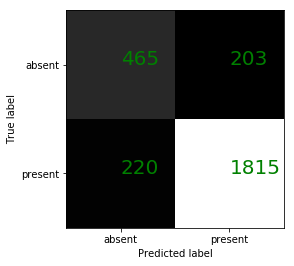

0.808361080281169
[[ 285  383]
 [ 135 1900]]


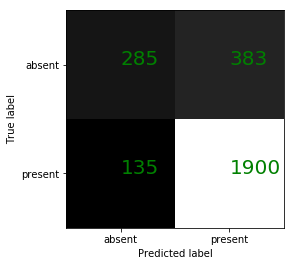

0.7528671846096929
[[   0  668]
 [   0 2035]]


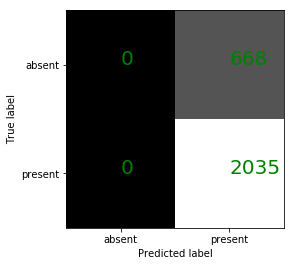

In [47]:
# Use scikit-learn to train a model with the training features we've extracted
from sklearn.svm import SVC
# Lets use a SVC with folowing C parameters: 
params = [10, 1, 0.1, 0.01, 0.001]

for c in params:
    clf = SVC(C=c)

    # Fit (=train) the model
    clf.fit(train_features_scaled, y_train)
    
    # save the model to disk
    #filename = 'finalized_model_SVM_'+str(c)+'_VGGish.sav'
    #print (filename)
    #joblib.dump(clf, filename)
    
    # Now lets predict the labels of the test data!
    predictions = clf.predict(test_features_scaled)
    # SVM Accuracy
    accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
    print(accuracy)
    
    # lets compute the show the confusion matrix:
    cm = sklearn.metrics.confusion_matrix(y_test, predictions)
    print(cm)
    
    plot_cm(cm)

In [20]:
# Now lets predict the labels of the test data!
predictions = clf.predict(test_features_scaled)

In [21]:
# Biased Guess Accuracy
ones = np.ones(len(predictions))
accuracy = sklearn.metrics.accuracy_score(y_test, ones)
print(accuracy)

0.7528671846096929


In [44]:
# SVM Accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print(accuracy)

0.7528671846096929


In [45]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(y_test, predictions)
print(cm)

[[   0  668]
 [   0 2035]]


### Random Forest Classifier without scaler

In [ ]:
# Use scikit-learn to train a model with the training features we've extracted
from sklearn.ensemble import RandomForestClassifier

results_rf = pd.DataFrame(columns=['classifier','parameter','accuracy', 'cm', 'features'])

classifier = 'RF'
features = 'MFCC'

for train_index, test_index in kf.split(X):

    test_features_scaled = scaler.transform(X_test)
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    params = [10, 20, 50, 100]

    for estimators in params:
        clf3 = RandomForestClassifier(n_estimators=estimators)

        # Fit (=train) the model
        clf3.fit(X_train, y_train)

        # save the model to disk
        #filename = 'finalized_model_RF_'+str(estimators)+'_VGGish.sav'
        #print (filename)
        #joblib.dump(clf3, filename)

        # Now lets predict the labels of the test data!
        predictions = clf3.predict(X_test)
        # We can use sklearn to compute the accuracy score
        accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
        print(accuracy)

        # lets compute the show the confusion matrix:
        cm = sklearn.metrics.confusion_matrix(y_test, predictions)
        print(cm)
        
        results_rf.loc[results_rf.index.max() + 1] = [classifier, c, accuracy, cm, features]

In [13]:
results_rf.to_pickle('results_random_forest.pkl')

In [18]:
import seaborn as sns 
ax = sns.boxplot(x="parameter", y="accuracy", data=results_rf)
ax.set(ylim=(.60, 1.00))

NameError: name 'results_rf' is not defined

0.7802441731409545
[[ 426  242]
 [ 352 1683]]


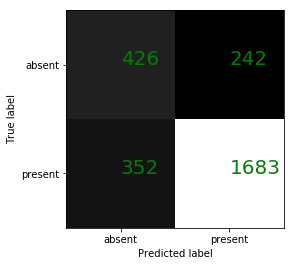

0.802441731409545
[[ 392  276]
 [ 258 1777]]


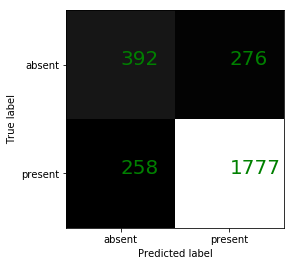

0.826489086200518
[[ 410  258]
 [ 211 1824]]


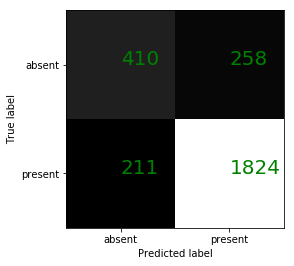

0.8157602663706992
[[ 384  284]
 [ 214 1821]]


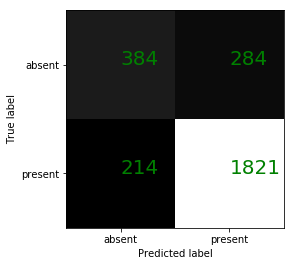

In [22]:
from sklearn.ensemble import RandomForestClassifier

params = [10, 20, 50, 100]

for estimators in params:
    clf3 = RandomForestClassifier(n_estimators=estimators)

    # Fit (=train) the model
    clf3.fit(X_train, y_train)
    
    # save the model to disk
    #filename = 'finalized_model_RF_'+str(estimators)+'_VGGish.sav'
    #print (filename)
    #joblib.dump(clf3, filename)
    
    # Now lets predict the labels of the test data!
    predictions = clf3.predict(X_test)
    # We can use sklearn to compute the accuracy score
    accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
    print(accuracy)
    
    # lets compute the show the confusion matrix:
    cm = sklearn.metrics.confusion_matrix(y_test, predictions)
    print(cm)
    
    plot_cm(cm)

In [16]:
# Now lets predict the labels of the test data!
predictions = clf3.predict(X_test)

In [17]:
# We can use sklearn to compute the accuracy score
accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print(accuracy)

0.808361080281169


In [18]:
# lets compute the show the confusion matrix:
cm = sklearn.metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 416  252]
 [ 266 1769]]


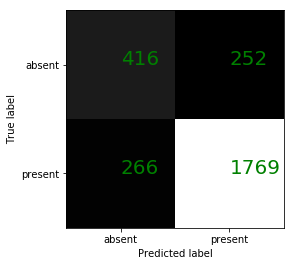

In [19]:
fig, ax = plt.subplots()
ax.imshow(cm, interpolation='nearest', cmap='gray')
for i, line in enumerate(cm):
    for j, l in enumerate(line):
        ax.text(j, i, l, size=20, color='green')
ax.set_xticks(range(len(cm)))
ax.set_xticklabels(labels)
ax.set_yticks(range(len(cm)))
ax.set_yticklabels(labels)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()